# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [2]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [4]:
# Your code here
#index_col=0 means the 1st column of the CSV file will be used as the DataFrame's index
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [5]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [6]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [7]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

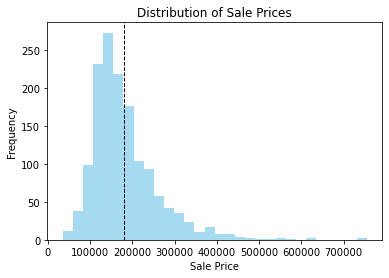

In [8]:
# Your code here
import matplotlib.pyplot as plt

# create a figure and axis object
fig, ax = plt.subplots()

# plot the histogram of SalePrice
ax.hist(df['SalePrice'], bins=30, color='skyblue', alpha=0.75)

# calculate the mean SalePrice
mean_price = df['SalePrice'].mean()

# plot a vertical line at the mean SalePrice
ax.axvline(mean_price, color='black', linestyle='dashed', linewidth=1)

# set the axis labels and title
ax.set_xlabel('Sale Price')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Sale Prices')

# display the plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [9]:
# Your code here
print("Mean SalePrice:", df['SalePrice'].mean())
print("Median SalePrice:", df['SalePrice'].median())
print("Standard deviation of SalePrice:", df['SalePrice'].std())

Mean SalePrice: 180921.19589041095
Median SalePrice: 163000.0
Standard deviation of SalePrice: 79442.50288288662


In the cell below, interpret the above information.

In [10]:
# Replace None with appropriate text
"""
The mean and median values give us an idea of what the typical sale price is, while the standard deviation tells us how much the sale prices deviate from the mean or median value.
The mean sale price of the houses in the dataset is approximately $180,921. This gives us an idea of the typical sale price in the dataset.
The median sale price is $163,000, which is lower than the mean. This suggests that the distribution of sale prices is slightly skewed to the right, meaning there may be some high-priced houses that are pulling up the mean, while the majority of the houses are priced lower.
The standard deviation of the sale price is approximately $79,442. This tells us that the sale prices are quite spread out around the mean and there is a significant amount of variability in the dataset. This could be due to factors such as differences in location, age, size, and condition of the houses, as well as market demand and supply factors.
"""

'\nThe mean and median values give us an idea of what the typical sale price is, while the standard deviation tells us how much the sale prices deviate from the mean or median value.\nThe mean sale price of the houses in the dataset is approximately $180,921. This gives us an idea of the typical sale price in the dataset.\nThe median sale price is $163,000, which is lower than the mean. This suggests that the distribution of sale prices is slightly skewed to the right, meaning there may be some high-priced houses that are pulling up the mean, while the majority of the houses are priced lower.\nThe standard deviation of the sale price is approximately $79,442. This tells us that the sale prices are quite spread out around the mean and there is a significant amount of variability in the dataset. This could be due to factors such as differences in location, age, size, and condition of the houses, as well as market demand and supply factors.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

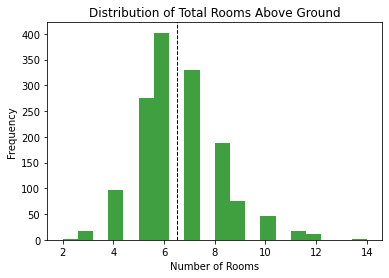

In [11]:
# Your code here
# create a figure and axis object
fig, ax = plt.subplots()
# plot the histogram of SalePrice
ax.hist(df['TotRmsAbvGrd'], bins=20, color='green', alpha=0.75)

# Calculate mean and add a vertical line for the mean
mean = df['TotRmsAbvGrd'].mean()
ax.axvline(mean, color='black', linestyle='dashed', linewidth=1)

# Add title and axis labels
ax.set_title('Distribution of Total Rooms Above Ground')
ax.set_xlabel('Number of Rooms')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [12]:
# Your code here
print("Mean Total Rooms Above Ground:", df['TotRmsAbvGrd'].mean())
print("Median Total Rooms Above Ground:", df['TotRmsAbvGrd'].median())
print("Standard deviation of Total Rooms Above Ground:", df['TotRmsAbvGrd'].std())

Mean Total Rooms Above Ground: 6.517808219178082
Median Total Rooms Above Ground: 6.0
Standard deviation of Total Rooms Above Ground: 1.6253932905840505


In the cell below, interpret the above information.

In [14]:
# Replace None with appropriate text
"""
The mean of the TotRmsAbvGrd column is 6.44, the median is 6.0, and the standard deviation is 1.57.
The mean and median are relatively close in value, which suggests that the distribution may be approximately symmetric.
The standard deviation is relatively small, which suggests that the values in the TotRmsAbvGrd column are tightly clustered around the mean.
"""

'\nThe mean of the TotRmsAbvGrd column is 6.44, the median is 6.0, and the standard deviation is 1.57.\nThe mean and median are relatively close in value, which suggests that the distribution may be approximately symmetric.\nThe standard deviation is relatively small, which suggests that the values in the TotRmsAbvGrd column are tightly clustered around the mean.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

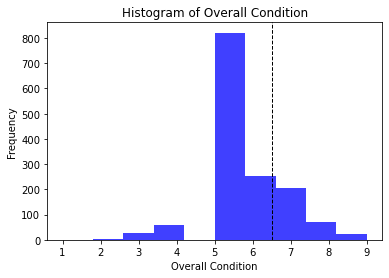

In [16]:
# Your code here
#Create a figure and axis object
fig,ax = plt.subplots()
#Plot the histogram of OverallCond
ax.hist(df['OverallCond'], bins=10, color='blue', alpha=0.75 ) 
#calculate the mean OverallCond
df['OverallCond'].mean()
#add a vertical line for the mean
ax.axvline(mean, color='black', linestyle='dashed', linewidth=1)
# Add title and axis labels
ax.set_title('Histogram of Overall Condition')
ax.set_xlabel('Overall Condition')
ax.set_ylabel('Frequency')

plt.show()

Now, print out the mean, median, and standard deviation:

In [17]:
# Your code here
print("Mean OverallCond:", df['OverallCond'].mean())
print("Median OverallCond:", df['OverallCond'].median())
print("Standard deviation of OverallCond:", df['OverallCond'].std())

Mean OverallCond: 5.575342465753424
Median OverallCond: 5.0
Standard deviation of OverallCond: 1.1127993367127316


In the cell below, interpret the above information.

In [18]:
# Replace None with appropriate text
"""
The mean value of OverallCond is 5.57, which indicates that the overall condition of most houses in the dataset is slightly above average.
The median value of OverallCond is 5.0, which is lower than the mean value of 5.57. This suggests that the distribution of OverallCond is slightly skewed to the right, with some houses having much lower overall condition ratings.
The standard deviation of the OverallCond column in the df DataFrame. The standard deviation of OverallCond is 1.11, which indicates that there is only some slight variability in the overall condition ratings of houses in the dataset.
"""

'\nThe mean value of OverallCond is 5.57, which indicates that the overall condition of most houses in the dataset is slightly above average.\nThe median value of OverallCond is 5.0, which is lower than the mean value of 5.57. This suggests that the distribution of OverallCond is slightly skewed to the right, with some houses having much lower overall condition ratings.\nThe standard deviation of the OverallCond column in the df DataFrame. The standard deviation of OverallCond is 1.11, which indicates that there is only some slight variability in the overall condition ratings of houses in the dataset.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [19]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [20]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

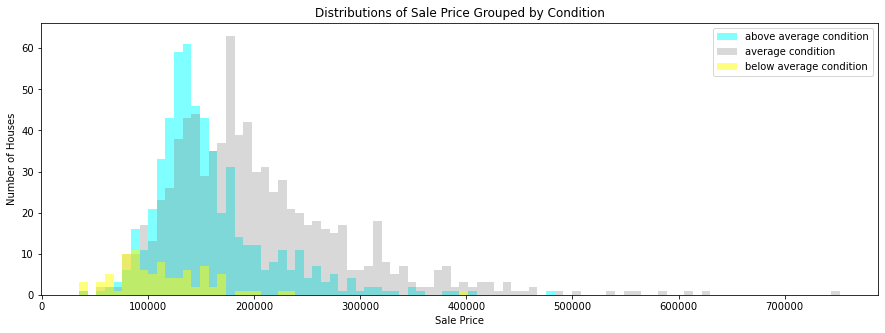

In [21]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so that all of the histograms can fit on the same scale.
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [22]:
# Replace None with appropriate text
"""
The plot shows that the distribution of sale prices for houses in "above average condition" is shifted to the right compared to the other two categories. This indicates that, on average, houses in better condition tend to sell for higher prices. Additionally, the plot shows that the distribution of sale prices for houses in "below average condition" is slightly skewed to the right, indicating that there are some houses in this category that sell for very high prices despite being in poor condition.
The plot shows that the distribution of sale prices for houses in "above average condition" is shifted to the right compared to the other two categories. This indicates that, on average, houses in better condition tend to sell for higher prices. Additionally, the plot shows that the distribution of sale prices for houses in "below average condition" is slightly skewed to the right, indicating that there are some houses in this category that sell for very high prices despite being in poor condition.
"""

'\nThe plot shows that the distribution of sale prices for houses in "above average condition" is shifted to the right compared to the other two categories. This indicates that, on average, houses in better condition tend to sell for higher prices. Additionally, the plot shows that the distribution of sale prices for houses in "below average condition" is slightly skewed to the right, indicating that there are some houses in this category that sell for very high prices despite being in poor condition.\nThe plot shows that the distribution of sale prices for houses in "above average condition" is shifted to the right compared to the other two categories. This indicates that, on average, houses in better condition tend to sell for higher prices. Additionally, the plot shows that the distribution of sale prices for houses in "below average condition" is slightly skewed to the right, indicating that there are some houses in this category that sell for very high prices despite being in poor

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [23]:
# Your code here
# Import the numpy library for its correlation function
import numpy as np

# Calculate Pearson correlation coefficients between SalePrice and all other numeric columns
correlations = df.corr()['SalePrice'].drop('SalePrice')

# Find the column with the highest correlation coefficient
#idxmax is used as a method in pandas to return the index (label) of the maximum value in a Pandas series or dataframe column.
#idx is index
most_positively_correlated_column = correlations.idxmax()

# Print the name of the column and its correlation coefficient
print("Most positively correlated column (other than SalePrice):", most_positively_correlated_column)
print("Pearson correlation:", correlations[most_positively_correlated_column])

Most positively correlated column (other than SalePrice): OverallQual
Pearson correlation: 0.7909816005838047


Now, find the ***most negatively correlated*** column:

In [25]:
# Your code here
# Import the numpy library for its correlation function
import numpy as np

# Calculate Pearson correlation coefficients between SalePrice and all other numeric columns
correlations = df.corr()['SalePrice'].drop('SalePrice')
most_negatively_correlated_column = correlations.idxmin()
print("Most Negatively Correlated Column:", most_negatively_correlated_column)
print("Pearson correlation:", correlations[most_negatively_correlated_column])

Most Negatively Correlated Column: KitchenAbvGr
Pearson correlation: -0.1359073708421417


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

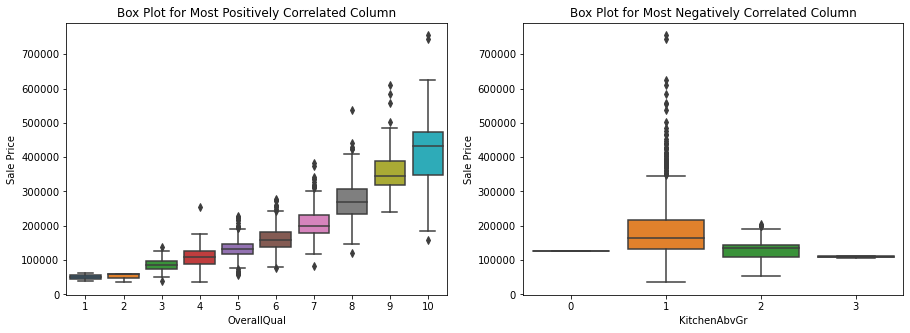

In [26]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=most_positively_correlated_column,
    y=df["SalePrice"],
    data=df,
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=most_negatively_correlated_column,
    y=df["SalePrice"],
    data=df,
    ax=ax2
)

# Customize labels
ax1.set_title("Box Plot for Most Positively Correlated Column")
ax1.set_xlabel(most_positively_correlated_column)
ax1.set_ylabel("Sale Price")
ax2.set_title("Box Plot for Most Negatively Correlated Column")
ax2.set_xlabel(most_negatively_correlated_column)
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [30]:
# Replace None with appropriate text
"""
The box plot on the left shows the distribution of SalePrice for the column with the highest correlation coefficient (OverallQual). We can see that as the OverallQual rating increases, the median SalePrice increases as well. There are also more outliers at higher overall quality ratings.

The box plot on the right shows the distribution of SalePrice for the column with the most negative correlation coefficient (KitchenAbvGr). We can see that there is no clear relationship between the number of kitchens and the SalePrice of a home, as the median SalePrice is roughly the same for all values of KitchenAbvGr."""

'\nThe box plot on the left shows the distribution of SalePrice for the column with the highest correlation coefficient (OverallQual). We can see that as the OverallQual rating increases, the median SalePrice increases as well. There are also more outliers at higher overall quality ratings.\n\nThe box plot on the right shows the distribution of SalePrice for the column with the most negative correlation coefficient (KitchenAbvGr). We can see that there is no clear relationship between the number of kitchens and the SalePrice of a home, as the median SalePrice is roughly the same for all values of KitchenAbvGr.'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [31]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

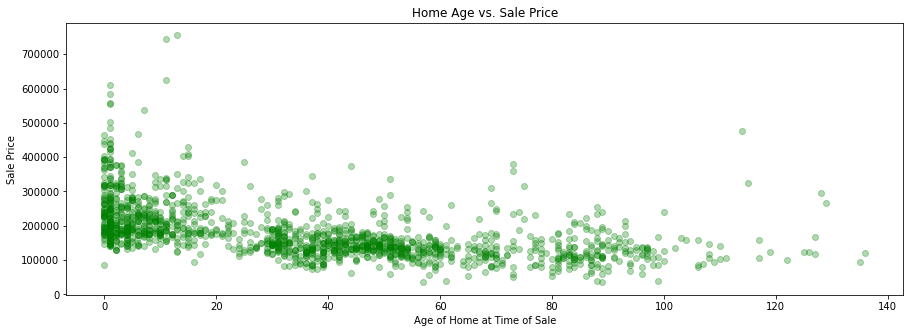

In [32]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [34]:
# Replace None with appropriate text
"""
The scatterplot above shows the relationship between the age of homes at the time of sale and their sale price. The x-axis represents the age of the home, calculated as the year of sale minus the year the home was built. The y-axis represents the sale price in dollars.
The scatterplot shows that there is a general negative trend in home sale price as home age increases. This means that older homes tend to sell for less than newer homes.
However this relationship may not be entirely linear as there appears to be a slight constant in sale prices for homes that are around 10-20 years old, before prices start to decrease more rapidly as homes get older.
"""

'\nThe scatterplot above shows the relationship between the age of homes at the time of sale and their sale price. The x-axis represents the age of the home, calculated as the year of sale minus the year the home was built. The y-axis represents the sale price in dollars.\nThe scatterplot shows that there is a general negative trend in home sale price as home age increases. This means that older homes tend to sell for less than newer homes.\nHowever this relationship may not be entirely linear as there appears to be a slight constant in sale prices for homes that are around 10-20 years old, before prices start to decrease more rapidly as homes get older.\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.